# Вариант проргаммы, с вводом произвольного k, и выводом процента ошибок и confusion matrix

In [20]:
import numpy as np    
def get_labels(pts, centroids,k):
    dist = np.arange(k*pts.shape[0]).reshape(k, pts.shape[0])
    dist= [np.linalg.norm(pts - centroids[i], axis=1) for i in range(k)]
    arr_of_closest_to_centroid=np.argmin(dist, axis=0)
    old_arr=np.zeros((k,pts.shape[1]))
    mask=[False]*k
    
    while np.linalg.norm(old_arr-centroids)>0.000000000000000001 :
        dist= [np.linalg.norm(pts - centroids[i], axis=1) for i in range(k)]
        arr_of_closest_to_centroid=np.argmin(dist, axis=0)
        
        old_arr=centroids.copy()
        mask= [arr_of_closest_to_centroid==i  for i in range(k)]
        
        for i in range(k):
            if any(mask[i]):
                centroids[i]=pts[mask[i]].mean(0)
  
    return arr_of_closest_to_centroid, centroids, mask
import matplotlib.pyplot as plt


from sklearn.datasets import load_digits
digits = load_digits()
data= np.reshape(np.ravel(digits.images), (digits.images.shape[0], -1))
k=int(input())
centroids = np.arange(data.shape[1]*k).reshape((k, data.shape[1]))
for i in range(k):
    centroids[i]=data[i]


mask=[False]*k    
labels, centroids,mask = get_labels(data, centroids,k)
centroidlab=[np.argmax(np.bincount(digits.target[mask[i]])) for i in range(k)]
errrate=[1-np.bincount(digits.target[mask[i]])[centroidlab[i]]/np.bincount(digits.target[mask[i]]).sum() for i in range(k)]
centroids=np.reshape(np.ravel(centroids),(centroids.shape[0],8,8))
confmat=np.zeros((10,10))
for i in range(k): 
    count=np.bincount(digits.target[mask[i]], minlength=10)
    for j in range(10):
        confmat[centroidlab[i]][j]= count[j]  
print(confmat)
totalerr=0;
for i in range(k):
    totalerr+=errrate[i]*mask[i].sum()/data.shape[0]   
print(totalerr)

10
[[177.   0.   1.   0.   0.   0.   1.   0.   0.   0.]
 [  0.  53.   2.   0.   7.   0.   0.   2.   6.  20.]
 [  0.  25. 148.   1.   0.   0.   0.   0.   3.   0.]
 [  0.   0.  12. 162.   0.  39.   0.   0.  13. 145.]
 [  1.   0.   0.   0. 160.   1.   0.   0.   0.   0.]
 [  0.   1.   0.   1.   0. 140.   0.   3.   3.   4.]
 [  0.   2.   0.   0.   0.   2. 176.   0.   1.   0.]
 [  0.   0.   2.   8.   6.   0.   0. 166.   3.   7.]
 [  0.   0.  10.  11.   3.   0.   1.   7. 135.   4.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]]
0.2109070673344463


# Вариант программы, выводящий зависимость времени работы и процента ошибок от k

введите до какого k проверять, k>=10
50


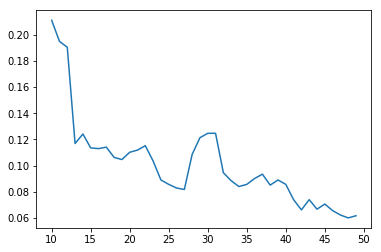

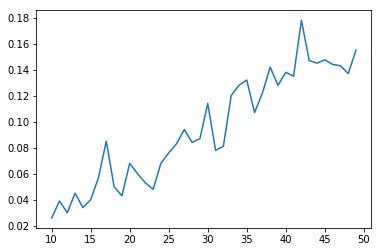

In [43]:
import numpy as np    
def get_labels(pts, centroids,k):
    dist = np.arange(k*pts.shape[0]).reshape(k, pts.shape[0])
    dist= [np.linalg.norm(pts - centroids[i], axis=1) for i in range(k)]
    arr_of_closest_to_centroid=np.argmin(dist, axis=0)
    old_arr=np.zeros((k,pts.shape[1]))
    mask=[False]*k
    
    while np.linalg.norm(old_arr-centroids)>0.000000000000000001 :
        dist= [np.linalg.norm(pts - centroids[i], axis=1) for i in range(k)]
        arr_of_closest_to_centroid=np.argmin(dist, axis=0)
        
        old_arr=centroids.copy()
        mask= [arr_of_closest_to_centroid==i  for i in range(k)]
        
        for i in range(k):
            if any(mask[i]):
                centroids[i]=pts[mask[i]].mean(0)
  
    return arr_of_closest_to_centroid, centroids, mask
import matplotlib.pyplot as plt
print("введите до какого k проверять, k>=10")
p=int(input())
from sklearn.datasets import load_digits
digits = load_digits()
data= np.reshape(np.ravel(digits.images), (digits.images.shape[0], -1))
totalerr=np.zeros((2,p-10))
import time
for k in np.arange(10,p):
    start_time = time.time()
    centroids = np.arange(data.shape[1]*k).reshape((k, data.shape[1]))
    for i in range(k):
        centroids[i]=data[i]


    mask=[False]*k    
    labels, centroids,mask = get_labels(data, centroids,k)
    centroidlab=[np.argmax(np.bincount(digits.target[mask[i]])) for i in range(k)]
    errrate=[1-np.bincount(digits.target[mask[i]])[centroidlab[i]]/np.bincount(digits.target[mask[i]]).sum() for i in range(k)]
    centroids=np.reshape(np.ravel(centroids),(centroids.shape[0],8,8))
    confmat=np.zeros((10,10))
    for i in range(k): 
        count=np.bincount(digits.target[mask[i]], minlength=10)
        for j in range(10):
            confmat[centroidlab[i]][j]= count[j]  
    totalerr[0][k-10]=0;
    for i in range(k):
        totalerr[0][k-10]+=errrate[i]*mask[i].sum()/data.shape[0]   
    totalerr[1][k-10]= float(time.time() - start_time)
plt.plot(np.arange(10,p),totalerr[0])
plt.show()
plt.plot(np.arange(10,p),totalerr[1])
plt.show()

Оптимальное k=23, т.к. имеет высокую скорость работы и точность почти как на k=27 или при k>40

# Вариант работы программы с оптимальным k

[[ 85.   0.   1.   0.   0.   0.   2.   0.   0.   0.]
 [  0.  37.   0.   0.   0.   0.   0.   0.   3.   1.]
 [  0.   0. 108.   0.   0.   0.   0.   0.   2.   0.]
 [  0.   0.   6.  75.   0.   0.   0.   0.   0.   0.]
 [  1.   0.   0.   0.  92.   1.   0.   0.   0.   0.]
 [  0.   1.   0.   0.   0.  72.   0.   0.   0.   2.]
 [  0.   2.   0.   0.   0.   0.  82.   0.   1.   0.]
 [  0.   0.   1.   2.   0.   0.   0.  80.   0.   2.]
 [  0.   2.   0.  10.   3.   0.   1.   3.  53.   2.]
 [  0.   0.   0.  19.   0.   9.   0.   0.   0.  37.]]
0.10350584307178631


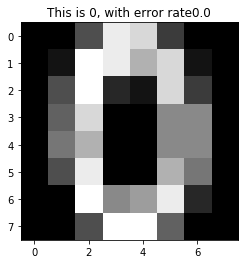

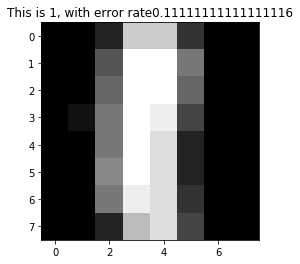

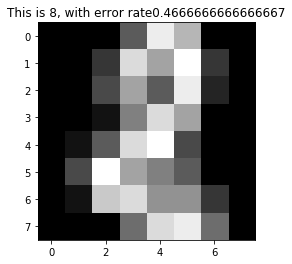

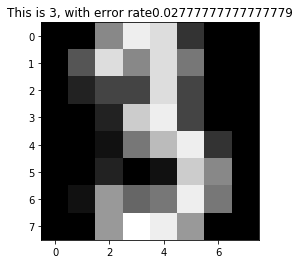

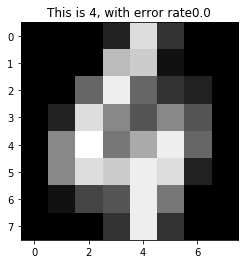

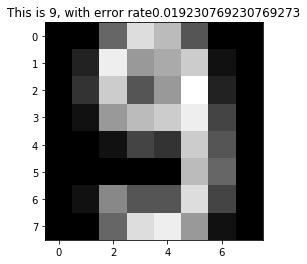

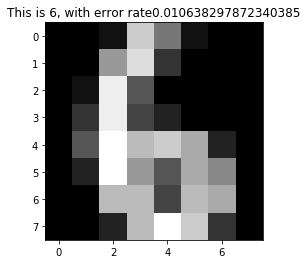

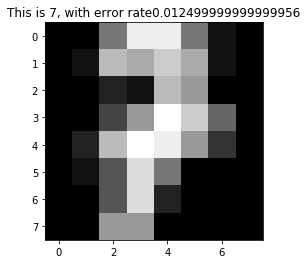

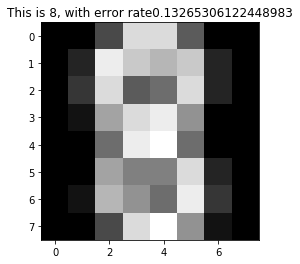

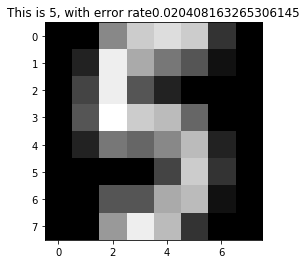

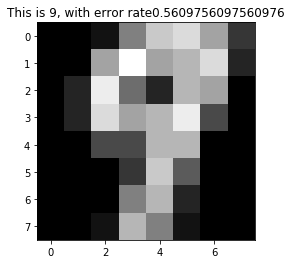

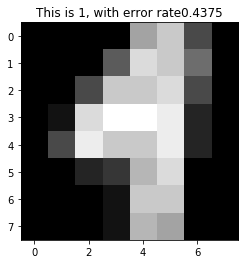

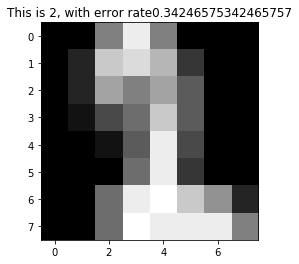

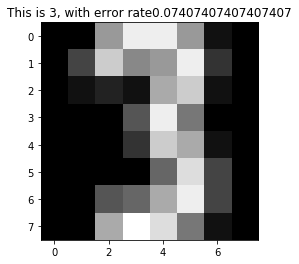

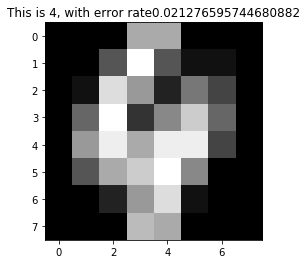

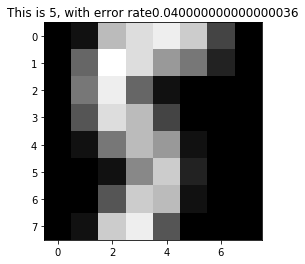

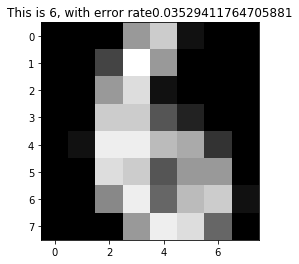

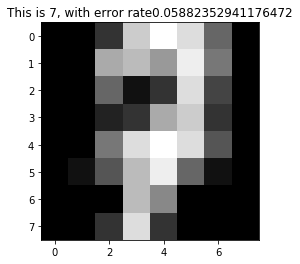

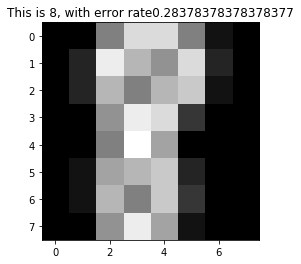

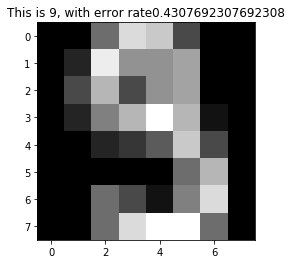

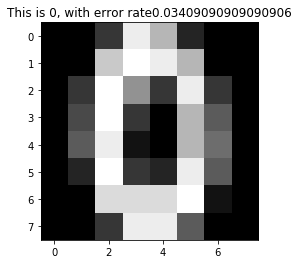

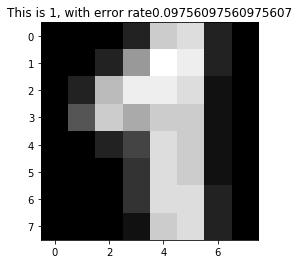

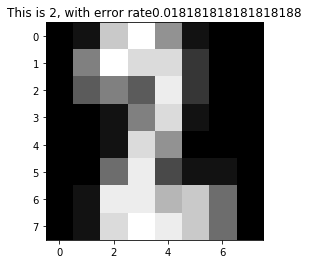

In [46]:
import numpy as np    
def get_labels(pts, centroids,k):
    dist = np.arange(k*pts.shape[0]).reshape(k, pts.shape[0])
    dist= [np.linalg.norm(pts - centroids[i], axis=1) for i in range(k)]
    arr_of_closest_to_centroid=np.argmin(dist, axis=0)
    old_arr=np.zeros((k,pts.shape[1]))
    mask=[False]*k
    
    while np.linalg.norm(old_arr-centroids)>0.000000000000000001 :
        dist= [np.linalg.norm(pts - centroids[i], axis=1) for i in range(k)]
        arr_of_closest_to_centroid=np.argmin(dist, axis=0)
        
        old_arr=centroids.copy()
        mask= [arr_of_closest_to_centroid==i  for i in range(k)]
        
        for i in range(k):
            if any(mask[i]):
                centroids[i]=pts[mask[i]].mean(0)
  
    return arr_of_closest_to_centroid, centroids, mask
import matplotlib.pyplot as plt


from sklearn.datasets import load_digits
digits = load_digits()
data= np.reshape(np.ravel(digits.images), (digits.images.shape[0], -1))
k=23
centroids = np.arange(data.shape[1]*k).reshape((k, data.shape[1]))
for i in range(k):
    centroids[i]=data[i]


mask=[False]*k    
labels, centroids,mask = get_labels(data, centroids,k)
centroidlab=[np.argmax(np.bincount(digits.target[mask[i]])) for i in range(k)]
errrate=[1-np.bincount(digits.target[mask[i]])[centroidlab[i]]/np.bincount(digits.target[mask[i]]).sum() for i in range(k)]
centroids=np.reshape(np.ravel(centroids),(centroids.shape[0],8,8))
confmat=np.zeros((10,10))
for i in range(k): 
    count=np.bincount(digits.target[mask[i]], minlength=10)
    for j in range(10):
        confmat[centroidlab[i]][j]= count[j]  
print(confmat)
totalerr=0;
for i in range(k):
    totalerr+=errrate[i]*mask[i].sum()/data.shape[0]   
print(totalerr)
for i in range(k):
        plt.imshow(centroids[i], cmap='gray')
        plt.title('This is {}, with error rate{}'.format(centroidlab[i], errrate[i]))
        plt.show()